In [174]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import sys
import NR_a1_utils as utils 
from importlib import reload
import pandas as pd
reload(utils)

<module 'NR_a1_utils' from 'C:\\Users\\Christiaan\\Desktop\\Numerical_Recipes\\NR_a1_utils.py'>

In [175]:
seed = 42
print('Original seed:',seed)

Original seed: 42


mean = 1 k = 0
0.36787944117144233
mean = 5 k = 10
1.8871331317208108e-05
mean = 3 k = 20
4.618166957543835e-18
mean = 2.6 k = 40
6.717133577841115e-49
mean =  1 k =  0
[0.36787944117144233, inf, 0.36787944117144233, 0.04598493014643029, 0.0045417214959437326]


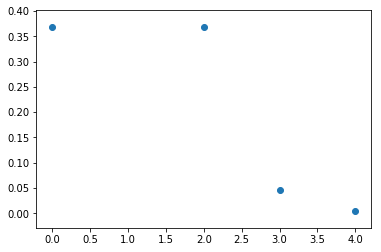

In [176]:

# Poisson distribution
a1 = [[1,0],[5,10],[3,20],[2.6,40]]#,[101,200]]
for i in range(len(a1)):
    print('mean =',a1[i][0],'k =',a1[i][1])
    print(utils.poisson_distribution(a1[i][0],a1[i][1]))
a1 = [[1,0],[5,10],[3,20],[2.6,40],[101,200]]
#a1 = [[101,200]]
#print('I hate my life')
#for i in range(len(a1)):
    #print(utils.poisson_distribution_new(a1[i][0],a1[i][1]))
    
x_test_p = np.linspace(0,4,5)
test_p = []
for i in range(len(x_test_p)):
    test_p.append(utils.poisson_distribution(1,int(x_test_p[i])))
print('mean = ',1,'k = ',int(x_test_p[0]))
print(test_p)
plt.scatter(x_test_p,test_p)
plt.show()


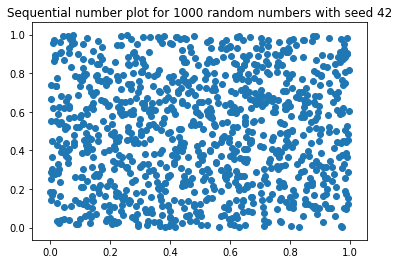

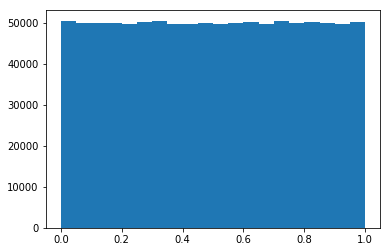

In [177]:
#--- 1.b ---
# RNG 
rng = utils.rng(seed)
# Scatter plot
N = 1000 
rand = rng.rand_num(N)
plt.scatter(rand[:(len(rand)-1)],rand[1:])
plt.title('Sequential number plot for {} random numbers with seed {}'.format(1000,seed))
plt.show()
# Histogram
N = 1000000
rand = rng.rand_num(N)
plt.hist(rand,bins=20,range=(0,1))
plt.show()

In [178]:
#--- 2.a --- 
a = rng.rand_num(1,min=1.1,max=2.5)
b = rng.rand_num(1,min=0.5,max=2)
c = rng.rand_num(1,min=1.5,max=4)
f = lambda x: 4*np.pi* (x**(a-1))/(b**(a-3)) *np.exp(-(x/b)**c)
f_int = utils.romber_int(f,0,5)
A = 1/f_int 
print('A = {}; a,b,c = {},{},{}'.format(A,float(a),float(b),float(c)))
#A = 0.03

A = 0.030593520989952466; a,b,c = 1.1903851299778927,1.4978073527317217,1.548543135201585


[1.10051637e+08 2.64351108e+04 4.03814981e+02 3.72236534e+00
 5.36796511e-04]


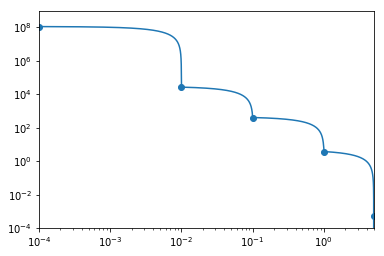

In [179]:
reload(utils)

xj = [10**-4,10**-2,10**-1,1,5]
n_x = lambda x: A*100*(x/b)**(a-3)*np.exp(-(x/b)**c)
n = n_x(xj)
print(n)
x = np.logspace(np.log10(1e-4),np.log10(5),10000)
y = np.zeros(10000)
y_lin = utils.interpol_lin_log(xj,n,x,y)
#y_nev = utils.interpol_neville(xj,n,x,y)

plt.scatter(xj,n)
#plt.plot(x,y_nev)
plt.plot(x,y_lin)
plt.xlim(left=10**-4,right=5)
plt.ylim(bottom=1e-4,top = 1e9)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [180]:
#--- 2.c --- 
n = lambda x: A*100*(x/b)**(a-3)*np.exp(-(x/b)**c)
x = b
dndx = utils.ridders_diff(n,np.array([b]))
dndx_analitic = lambda x: (A*100) * (((a-3)*(x/b)**(a-4)*np.exp(-(x/b)**c))/b - ((c*np.exp(-(x/b)**c)*(x/b)**(a+c-4))/b)) 
dndx_an = dndx_analitic(x)
print('dn/dx at x = b: analytic = {0:.12f}; numerical = {1:.12f}'.format(float(dndx_an),float(dndx)))


dn/dx at x = b: analytic = -2.523365429047; numerical = -2.523365429056


c:\users\christiaan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
c:\users\christiaan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


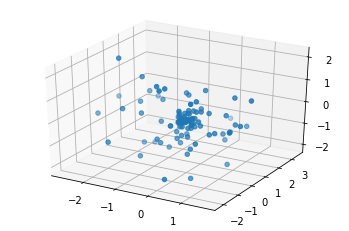

[0.46986167 1.25530031 1.33061083 1.14722547 1.18752897 0.87853034
 0.62108333 1.18746936 1.72562712 0.37202915 0.95335767 2.97865099
 2.18906528 1.1742803  0.57357804 0.5136484  1.66911345 1.43525198
 0.25748827 0.98207013 0.40427587 0.40936973 0.1874515  0.12884227
 0.62337535 0.11615874 1.87299182 0.18210318 0.27787159 1.5182841
 0.07361533 0.29814979 0.21796325 2.09057089 0.7227864  2.11334458
 0.02060311 2.65896921 0.37453836 0.10602007 1.80717641 1.27260787
 2.66388649 0.44072934 1.371436   0.91344405 0.25157062 1.13507686
 2.03580588 0.66467537 0.31238664 0.71951162 0.37342991 2.2300852
 0.63122292 0.90230498 0.21573231 0.26122429 1.21769353 0.30539183
 0.32065924 1.89714347 2.3531244  0.6652801  1.52910659 1.42349367
 1.5150065  0.15797758 3.04159159 1.26542352 1.71455092 0.88225224
 0.31145507 0.32996398 0.20773217 0.98796135 1.37368835 1.38556042
 0.72072417 2.77696531 0.42814548 2.03730122 0.22759075 0.19217583
 0.42905444 2.97072552 0.35670367 0.18803728 1.35537278 0.244955

In [188]:
#--- 2.d --- 
N = 100
xmax = 5
# Drawing random samples from n(x)
pn = lambda x: (n(x)*4*np.pi*x**2)/100
x_p = np.linspace(0,xmax,200)
g = np.max(pn(x_p)[1:])+0.01
samples = utils.rejection_sampler(N,pn,5,g,rng)
r = samples[0]
# Generating random angles: 
phi = rng.rand_num(N,min=0,max=2*np.pi)
theta = np.arccos(2*rng.rand_num(N)-1)
x,y,z = r*np.sin(theta)*np.cos(phi),r*np.sin(theta)*np.sin(phi),r*np.cos(theta)
# Plotting positions for N galaxies
ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(x,y,z)
plt.show()
print(np.concatenate((r,phi,theta),axis=0))

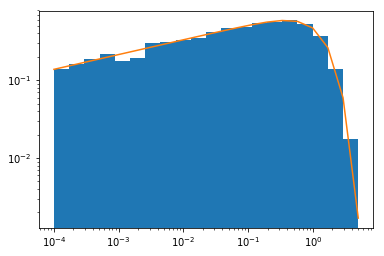

In [190]:
#--- 2.e --- 
N = 100000
samples = utils.rejection_sampler(N,pn,5,g,rng)
r = samples[0]
bins = np.logspace(np.log10(1e-4),np.log10(xmax),num=21)
plt.hist(r,bins=bins,density=True)
plt.plot(bins,pn(bins))
plt.yscale('log')
plt.xscale('log')
plt.show()

c:\users\christiaan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  
c:\users\christiaan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


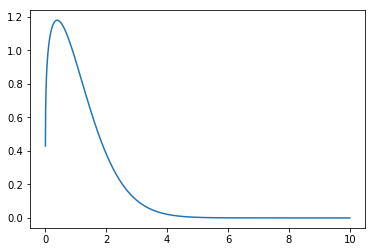

c:\users\christiaan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
c:\users\christiaan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


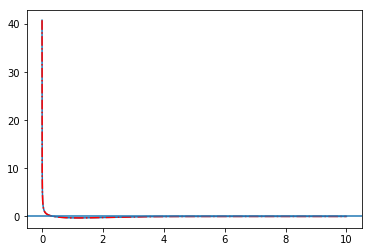

0.3869184059800736
Roots: 0.005325620802258036 1.577575109095508


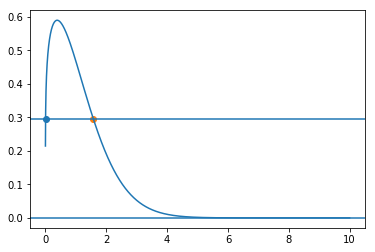

In [191]:
reload(utils)
#--- 2.f --- 
x = np.linspace(0,xmax*2,10000)
plt.plot(x,2*pn(x))
#plt.yscale('log')
#plt.xscale('log')
plt.show()

dpndx = utils.ridders_diff(pn,x)
dpndx_analytic = lambda x: A*4*np.pi*(np.exp(-(x/b)**c)*(((a-1)*b**(3-a)*x**(a-2))-(c*b**(2-a)*x**(a-1)*(x/b)**(c-1))))

plt.plot(x,dpndx)
plt.plot(x,dpndx_analytic(x),color='r',linestyle='-.')
plt.axhline(y=0)
plt.show()

dpndx_0 = float(utils.NewRaph_rootfinder(dpndx_analytic,1e-4,1,rng))
print(dpndx_0)
new_floor = float(pn(dpndx_0)/2)
pn_new_floor = lambda x: pn(x) - new_floor
root1 = float(utils.NewRaph_rootfinder(pn_new_floor,1e-4,dpndx_0,rng))
root2 = float(utils.NewRaph_rootfinder(pn_new_floor,dpndx_0,5,rng))
print('Roots:', root1,root2)
plt.scatter(root1,new_floor)
plt.scatter(root2,new_floor)
plt.plot(x,pn(x))
plt.axhline(y=0)
plt.axhline(y=new_floor)
plt.show()

26.124
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]
2.0684825230931427e-07
[1.9875310277772078e-11, 4.697800611621737e-11, 1.0178567988007292e-17, 2.0357135962887055e-18, 3.7806109692245716e-20, 6.553059004727184e-22, 1.064872087698579e-22, 1.6286278946280517e-23, 2.35246252563473e-25, 3.219159249423003e-26, 4.184907005349924e-28, 5.181313461657316e-29, 6.1233704276752736e-30, 6.92207092561123e-32, 7.498910182587383e-33, 7.798866607851791e-35, 7.798866615587006e-36, 7.51001969269625e-38, 6.973589702454196e-39, 6.252183841894053e-42, 5.418559362268889e-42, 4.544598180996179e-43, 3.69248601199034e-45, 2.9092314090691044e-46, 2.2247063721202034e-48, 1.6526390202781676e-49, 1.1935726261054841e-50, 8.387267080656477e-53, 5.738656439080946e-54, 3.825770939541872e-56, 2.4867511238021197e-58, 1.5769641176297053e-58, 9.762158920328391e-60, 5.902700721915532e-62, 3.487959504393707e-64, 2.0152655

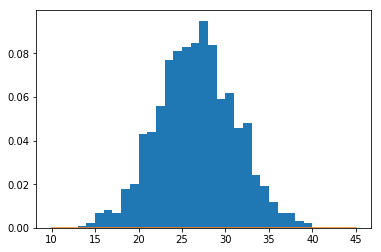

In [195]:
reload(utils)
#--- 2.g ---

# Manually remake bins (without plt.hist)
counts = np.zeros((len(bins)-1))
for i in r: 
    for j in range(len(bins)-1):
        if i < bins[j+1] and i > bins[j]:
            counts[j] += 1
r_list = []
r_halo_distrib = np.zeros((1000))
for i in range(len(r)):
    if r[i] < bins[utils.arg_max(counts)+1] and r[i] > bins[utils.arg_max(counts)]:
        r_list.append(r[i])
        r_halo_distrib[i//100] += 1
mean = sum(r_halo_distrib)/len(r_halo_distrib)
print(mean)
halo_bins = np.linspace(10,45,36)
print(halo_bins)
poissd = []
print(utils.poisson_distribution(26,10))
for i in range(len(halo_bins)):
    poissd.append(utils.poisson_distribution_new(round(mean),int(halo_bins[i])))
print(poissd)
print(utils.poisson_distribution_new(mean,25))
plt.hist(r_halo_distrib,halo_bins,density=True)
plt.plot(halo_bins,poissd)
plt.show()

# NEED TO FIX POISSON

In [ ]:
sr = utils.selection_sort(r_list)

Length: 26098, median: 1.2861689198005481, 16th: 1.0756693611362826, 84th: 1.5469696046080992


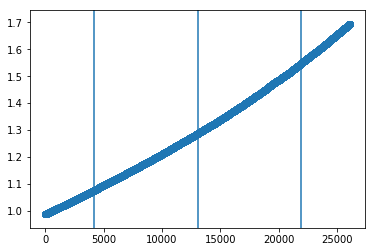

In [13]:
median = sr[int(len(sr)/2-0.5)]
p16th = sr[round(len(sr)*0.16)-1]
p84th = sr[round(len(sr)*0.84)-1]
print('Length: {}, median: {}, 16th: {}, 84th: {}'.format(len(sr),median,p16th,p84th))
x = np.linspace(0,len(sr)-1,len(sr))
plt.scatter(x,sr)
plt.axvline(x=int(len(sr)/2-0.5))
plt.axvline(x=round(len(sr)*0.16)-1)
plt.axvline(round(len(sr)*0.84)-1)
plt.show()

In [132]:
reload(utils)
#--- 2.h ---
al = np.linspace(1.1,2.5,15)
bl = np.linspace(0.5,2,16)
cl = np.linspace(1.5,4,26)
param = np.array((al,bl,cl))
Al = np.zeros([len(al),len(bl),len(cl)])
for i in range(len(al)):
    for j in range(len(bl)):
        for k in range(len(cl)):
            Al[i][j][k] = utils.A_calc(al[i],bl[j],cl[k])


In [133]:
reload(utils)
interpol = utils.trilinear_interpolator(al,bl,cl,Al,2.05,1.05,3.05)
print(interpol)

0.14501036855034055


In [130]:
reload(utils)
dat_path = 'C:/Users/Christiaan/Desktop/Numerical_Recipde/Data/'
dat = pd.read_csv('satgals_m15.txt',header=None,skiprows=3)
dat = utils.data_unpacker(dat)

print(dat[0][:,0])


[array([['0.78336043', '0.85125870', '0.85500888'],
       ['0.99833726', '1.9394623', '2.0552595'],
       ['1.0523991', '0.29890746', '0.77529356'],
       ['0.61402971', '2.3874775', '0.85668728'],
       ['0.47722253', '3.1214230', '1.1069411'],
       ['0.78289838', '0.71660218', '1.6674876'],
       ['0.65264496', '4.0543491', '0.57442715'],
       ['0.32885678', '4.2930482', '0.13508523'],
       ['1.0027845', '3.0181986', '1.4954229'],
       ['0.54307592', '5.1527175', '1.0780488'],
       ['0.46509304', '5.6484643', '1.6899492'],
       ['0.19845778', '2.6544026', '2.1582156'],
       ['0.41442954', '5.8654873', '1.3625437'],
       ['0.30291156', '1.9959547', '0.36857325'],
       ['0.89452071', '0.66848011', '1.6342799'],
       ['0.21678516', '0.13460678', '1.5132639'],
       ['1.4725962', '6.2003587', '2.0812592'],
       ['1.0505983', '2.3467908', '0.81910113'],
       ['1.0772530', '1.0167216', '0.92033290'],
       ['0.77345494', '0.76450444', '1.9328955'],
       ['0

In [120]:
a,b,c = 1,1,1
xs = [[a,b,c]]
for i in range(3):
    xs.append([float(a+rng.rand_num(1)),float(b+rng.rand_num(1)),float(c+rng.rand_num(1))])
xs = np.array(xs)
f = lambda xs : xs[:,0]**2+xs[:,1]-xs[:,2]
print(xs)
centroid = np.array([sum(xs[:,0]),sum(xs[:,1]),sum(xs[:,2])])/len(xs)
x_new = centroid + 1*(centroid-xs[-1])
print(centroid)
print(x_new)
    

NameError: name 'rng' is not defined

In [123]:
reload(utils)
a,b,c = 3.,3.,3.
xs = [[a,b,c]]
#f = lambda xs : xs[:,0]**2+xs[:,1]-xs[:,2]
f = lambda xs : (xs[:,0]-1/3)**2+(xs[:,1]-2/3)**2+(xs[:,2]-1/3)**2
min = utils.downhill_simplex(f,a,b,c)
print(min)

[[3. 3. 3.]
 [4. 3. 3.]
 [3. 4. 3.]
 [3. 3. 4.]]
-------------------
xs: [[3. 3. 3.]
 [3. 4. 3.]
 [4. 3. 3.]
 [3. 3. 4.]]
fxs: [19.66666667 25.33333333 26.         26.        ]
Centroid: [3.25 3.25 3.25]
x_new: [[3.5 3.5 2.5]]
fx_new [22.75]
Back to top
-------------------
xs: [[3.  3.  3. ]
 [3.5 3.5 2.5]
 [3.  4.  3. ]
 [4.  3.  3. ]]
fxs: [19.66666667 22.75       25.33333333 26.        ]
Centroid: [3.375 3.375 2.875]
x_new: [[2.75 3.75 2.75]]
fx_new [21.1875]
Back to top
-------------------
xs: [[3.   3.   3.  ]
 [2.75 3.75 2.75]
 [3.5  3.5  2.5 ]
 [3.   4.   3.  ]]
fxs: [19.66666667 21.1875     22.75       25.33333333]
Centroid: [3.0625 3.5625 2.8125]
x_new: [[3.125 3.125 2.625]]
fx_new [19.08854167]
Expanding
-------------------
xs: [[3.1875 2.6875 2.4375]
 [3.     3.     3.    ]
 [2.75   3.75   2.75  ]
 [3.5    3.5    2.5   ]]
fxs: [16.65755208 19.66666667 21.1875     22.75      ]
Centroid: [3.109375 3.234375 2.671875]
x_new: [[2.71875 2.96875 2.84375]]
fx_new [17.29199219]
Back 

fxs: [7.31167422 7.31531881 7.31537617 7.31543775]
Centroid: [ 2.79905687  1.69057231 -0.0982626 ]
x_new: [[ 2.79917373  1.68990646 -0.09803131]]
fx_new [7.31346401]
Back to top
-------------------
xs: [[ 2.79939224  1.68869279 -0.09758466]
 [ 2.79917373  1.68990646 -0.09803131]
 [ 2.79895004  1.6911455  -0.09851872]
 [ 2.79894519  1.6912128  -0.09845314]]
fxs: [7.31167422 7.31346401 7.31531881 7.31537617]
Centroid: [ 2.7991153   1.69023939 -0.09814696]
x_new: [[ 2.79928541  1.68926598 -0.09784077]]
fx_new [7.31254009]
Back to top
-------------------
xs: [[ 2.79939224  1.68869279 -0.09758466]
 [ 2.79928541  1.68926598 -0.09784077]
 [ 2.79917373  1.68990646 -0.09803131]
 [ 2.79895004  1.6911455  -0.09851872]]
fxs: [7.31167422 7.31254009 7.31346401 7.31531881]
Centroid: [ 2.79920035  1.68975268 -0.09799386]
x_new: [[ 2.79945067  1.68835986 -0.09746901]]
fx_new [7.31118236]
Expanding
-------------------
xs: [[ 2.79970098  1.68696705 -0.09694416]
 [ 2.79939224  1.68869279 -0.09758466]
 [ 2

fx_new [7.2897526]
Back to top
-------------------
xs: [[ 2.80209316  1.67377871 -0.09170875]
 [ 2.80208792  1.6738076  -0.09172023]
 [ 2.8020825   1.6738375  -0.09173211]
 [ 2.80208233  1.67383841 -0.09173247]]
fxs: [7.28971053 7.2897526  7.28979614 7.28979747]
Centroid: [ 2.80208648  1.67381555 -0.09172339]
x_new: [[ 2.80209063  1.6737927  -0.09171431]]
fx_new [7.2897309]
Back to top
-------------------
xs: [[ 2.80209316  1.67377871 -0.09170875]
 [ 2.80209063  1.6737927  -0.09171431]
 [ 2.80208792  1.6738076  -0.09172023]
 [ 2.8020825   1.6738375  -0.09173211]]
fxs: [7.28971053 7.2897309  7.2897526  7.28979614]
Centroid: [ 2.80208855  1.67380412 -0.09171885]
x_new: [[ 2.80209461  1.67377075 -0.09170559]]
fx_new [7.28969895]
Expanding
-------------------
xs: [[ 2.80210066  1.67373738 -0.09169233]
 [ 2.80209316  1.67377871 -0.09170875]
 [ 2.80209063  1.6737927  -0.09171431]
 [ 2.80208792  1.6738076  -0.09172023]]
fxs: [7.28965036 7.28971053 7.2897309  7.2897526 ]
Centroid: [ 2.80209309

Expanding
-------------------
xs: [[ 2.8021588   1.67341697 -0.09156505]
 [ 2.80215867  1.67341771 -0.09156534]
 [ 2.80215867  1.67341771 -0.09156534]
 [ 2.80215855  1.67341839 -0.09156561]]
fxs: [7.28918401 7.28918508 7.28918508 7.28918607]
Centroid: [ 2.80215867  1.67341769 -0.09156533]
x_new: [[ 2.8021588   1.673417   -0.09156506]]
fx_new [7.28918405]
Back to top
-------------------
xs: [[ 2.8021588   1.67341697 -0.09156505]
 [ 2.8021588   1.673417   -0.09156506]
 [ 2.80215867  1.67341771 -0.09156534]
 [ 2.80215867  1.67341771 -0.09156534]]
fxs: [7.28918401 7.28918405 7.28918508 7.28918508]
Centroid: [ 2.80215873  1.67341735 -0.0915652 ]
x_new: [[ 2.8021588   1.67341698 -0.09156505]]
fx_new [7.28918403]
Back to top
-------------------
xs: [[ 2.8021588   1.67341697 -0.09156505]
 [ 2.8021588   1.67341698 -0.09156505]
 [ 2.8021588   1.673417   -0.09156506]
 [ 2.80215867  1.67341771 -0.09156534]]
fxs: [7.28918401 7.28918403 7.28918405 7.28918508]
Centroid: [ 2.80215877  1.67341717 -0.09

Centroid: [ 2.80215994  1.67341069 -0.09156255]
x_new: [[ 2.80215994  1.67341068 -0.09156255]]
fx_new [7.28917485]
Expanding
-------------------
xs: [[ 2.80215995  1.67341066 -0.09156254]
 [ 2.80215994  1.67341068 -0.09156255]
 [ 2.80215994  1.67341068 -0.09156255]
 [ 2.80215994  1.6734107  -0.09156255]]
fxs: [7.28917483 7.28917486 7.28917486 7.28917488]
Centroid: [ 2.80215994  1.67341068 -0.09156255]
x_new: [[ 2.80215995  1.67341066 -0.09156254]]
fx_new [7.28917483]
Back to top
-------------------
xs: [[ 2.80215995  1.67341066 -0.09156254]
 [ 2.80215995  1.67341066 -0.09156254]
 [ 2.80215994  1.67341068 -0.09156255]
 [ 2.80215994  1.67341068 -0.09156255]]
fxs: [7.28917483 7.28917483 7.28917486 7.28917486]
Centroid: [ 2.80215995  1.67341067 -0.09156254]
x_new: [[ 2.80215995  1.67341066 -0.09156254]]
fx_new [7.28917483]
Back to top
-------------------
xs: [[ 2.80215995  1.67341066 -0.09156254]
 [ 2.80215995  1.67341066 -0.09156254]
 [ 2.80215995  1.67341066 -0.09156254]
 [ 2.80215994  1

Centroid: [ 2.80215997  1.67341051 -0.09156248]
x_new: [[ 2.80215997  1.67341051 -0.09156248]]
fx_new [7.28917461]
Expanding
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215997  1.67341051 -0.09156248]
 [ 2.80215997  1.67341051 -0.09156248]
 [ 2.80215997  1.67341051 -0.09156248]]
fxs: [7.28917461 7.28917461 7.28917461 7.28917461]
Centroid: [ 2.80215997  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.28917461]
Back to top
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215997  1.67341051 -0.09156248]
 [ 2.80215997  1.67341051 -0.09156248]]
fxs: [7.28917461 7.28917461 7.28917461 7.28917461]
Centroid: [ 2.80215997  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.28917461]
Expanding
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215997  1.6

-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Expanding
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Back to top
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.802159

x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Expanding
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Back to top
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Expanding
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7

-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Expanding
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Back to top
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.802159

x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Expanding
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Back to top
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Expanding
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7

Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Back to top
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Expanding
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]]
fxs: [7.2891746 7.2891746 7.2891746 7.2891746]
Centroid: [ 2.80215998  1.67341051 -0.09156248]
x_new: [[ 2.80215998  1.67341051 -0.09156248]]
fx_new [7.2891746]
Expanding
-------------------
xs: [[ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.09156248]
 [ 2.80215998  1.67341051 -0.

fxs: [7.28917459 7.28917459 7.28917459 7.28917459]
Centroid: [ 2.80215998  1.6734105  -0.09156247]
x_new: [[ 2.80215998  1.6734105  -0.09156247]]
fx_new [7.28917459]
Back to top
-------------------
xs: [[ 2.80215998  1.6734105  -0.09156247]
 [ 2.80215998  1.6734105  -0.09156247]
 [ 2.80215998  1.6734105  -0.09156247]
 [ 2.80215998  1.6734105  -0.09156247]]
fxs: [7.28917459 7.28917459 7.28917459 7.28917459]
Centroid: [ 2.80215998  1.6734105  -0.09156247]
x_new: [[ 2.80215998  1.6734105  -0.09156247]]
fx_new [7.28917459]
Expanding
-------------------
xs: [[ 2.80215998  1.6734105  -0.09156247]
 [ 2.80215998  1.6734105  -0.09156247]
 [ 2.80215998  1.6734105  -0.09156247]
 [ 2.80215998  1.6734105  -0.09156247]]
fxs: [7.28917459 7.28917459 7.28917459 7.28917459]
Centroid: [ 2.80215998  1.6734105  -0.09156247]
x_new: [[ 2.80215998  1.6734105  -0.09156247]]
fx_new [7.28917459]
Expanding
-------------------
xs: [[ 2.80215998  1.6734105  -0.09156247]
 [ 2.80215998  1.6734105  -0.09156247]
 [ 2.8

fx_new [7.28917454]
Expanding
-------------------
xs: [[ 2.80215998  1.67341047 -0.09156246]
 [ 2.80215998  1.67341047 -0.09156246]
 [ 2.80215998  1.67341047 -0.09156246]
 [ 2.80215998  1.67341047 -0.09156246]]
fxs: [7.28917454 7.28917454 7.28917455 7.28917455]
Centroid: [ 2.80215998  1.67341047 -0.09156246]
x_new: [[ 2.80215998  1.67341047 -0.09156246]]
fx_new [7.28917454]
Back to top
-------------------
xs: [[ 2.80215998  1.67341047 -0.09156246]
 [ 2.80215998  1.67341047 -0.09156246]
 [ 2.80215998  1.67341047 -0.09156246]
 [ 2.80215998  1.67341047 -0.09156246]]
fxs: [7.28917454 7.28917454 7.28917454 7.28917455]
Centroid: [ 2.80215998  1.67341047 -0.09156246]
x_new: [[ 2.80215998  1.67341047 -0.09156246]]
fx_new [7.28917454]
Expanding
-------------------
xs: [[ 2.80215998  1.67341047 -0.09156246]
 [ 2.80215998  1.67341047 -0.09156246]
 [ 2.80215998  1.67341047 -0.09156246]
 [ 2.80215998  1.67341047 -0.09156246]]
fxs: [7.28917454 7.28917454 7.28917454 7.28917454]
Centroid: [ 2.80215998

In [127]:
x = np.array([[1,2,3,4],[5,6,7,8]])
print(x[:,0])

[1 5]
